In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Sat Dec  5 03:50:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/car dataset/Train'
test_path = '/content/drive/MyDrive/car dataset/Test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/car dataset/Train/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/car dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/car dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Epoch 1/50
2/2 [==============================] - 29s 14s/step - loss: 8.3509 - accuracy: 0.2969 - val_loss: 6.3327 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 357ms/step - loss: 5.4061 - accuracy: 0.3750 - val_loss: 6.6427 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 361ms/step - loss: 6.4160 - accuracy: 0.3125 - val_loss: 4.5918 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 366ms/step - loss: 4.0469 - accuracy: 0.3281 - val_loss: 1.1589 - val_accuracy: 0.4483
Epoch 5/50
2/2 [==============================] - 1s 357ms/step - loss: 1.8336 - accuracy: 0.5000 - val_loss: 5.7080 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 358ms/step - loss: 3.7488 - accuracy: 0.4062 - val_loss: 4.5653 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 370ms/step - loss: 2.6016 - accuracy: 0.4219 - val_loss: 1.3613 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=====

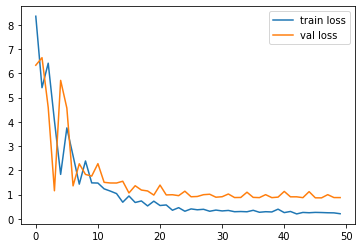

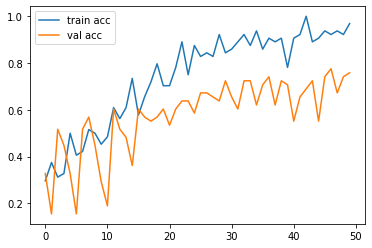

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.76773239e-02, 9.67736244e-01, 1.45864561e-02],
       [1.38609344e-02, 4.58790541e-01, 5.27348518e-01],
       [5.44218495e-02, 6.70580287e-03, 9.38872278e-01],
       [9.41931009e-01, 4.28557508e-02, 1.52131701e-02],
       [3.83872166e-02, 8.55641007e-01, 1.05971754e-01],
       [6.29900163e-03, 6.50593579e-01, 3.43107432e-01],
       [1.06350947e-02, 9.88819063e-01, 5.45920921e-04],
       [1.92011278e-02, 9.11499143e-01, 6.92996457e-02],
       [2.97884084e-02, 7.37653494e-01, 2.32558101e-01],
       [5.84307760e-02, 6.33902133e-01, 3.07667106e-01],
       [1.02312647e-01, 2.94845793e-02, 8.68202746e-01],
       [1.90996027e-04, 9.95910764e-01, 3.89828347e-03],
       [9.26185341e-04, 9.78335440e-01, 2.07384154e-02],
       [4.95434329e-02, 8.80914509e-01, 6.95420429e-02],
       [8.04346740e-01, 1.93821967e-01, 1.83125644e-03],
       [5.32662459e-02, 9.02731996e-03, 9.37706411e-01],
       [1.37213171e-01, 5.65130174e-01, 2.97656655e-01],
       [2.84863919e-01, 5.83436

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/car dataset/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:

x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.04958649, 0.22268483, 0.7277287 ]], dtype=float32)

In [ ]:

a=np.argmax(model.predict(img_data), axis=1)
a

array([2])